In [365]:
import pandas as pd
import matplotlib.pyplot as plt

In [366]:
df_shootings = pd.read_csv('fatal-police-shootings-data.csv')
df_shootings.rename(columns={'state': 'abbreviation'}, inplace=True)
df_shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [367]:
pivot_table = pd.pivot_table(df_shootings, values='id', index=['race'], columns=['signs_of_mental_illness'],
                             aggfunc='count')
pivot_table

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [368]:
pivot_table['procentage_of_mental_illness_per_race'] = pivot_table.apply(
    lambda row: row[True] * 100 / (row[True] + row[False]), axis=1)
pivot_table

signs_of_mental_illness,False,True,procentage_of_mental_illness_per_race
race,,,
A,69,24,25.806452
B,1114,184,14.175655
H,745,157,17.405765
N,64,14,17.948718
O,37,11,22.916667
W,1763,713,28.796446


In [369]:
pivot_table['procentage_of_mental_illness_per_race'].idxmax()

'W'

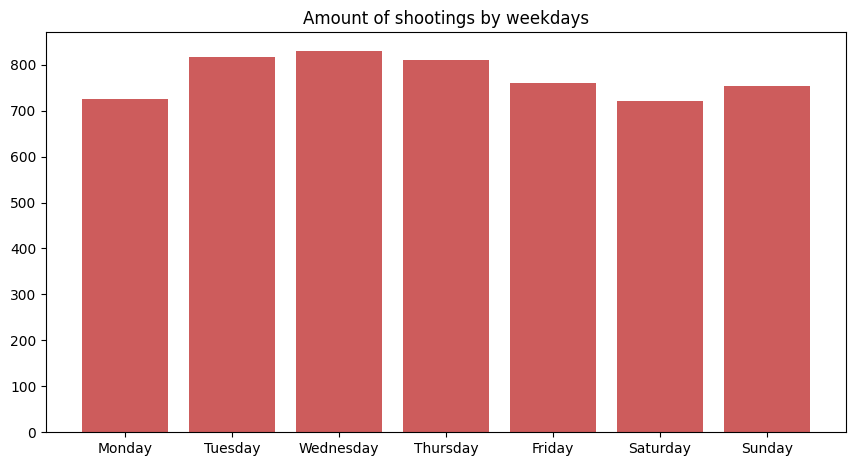

In [370]:
df_shootings['weekday'] = pd.to_datetime(df_shootings['date']).dt.weekday
by_weekdays = df_shootings['weekday'].value_counts().sort_index()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(by_weekdays.index, by_weekdays.values, color='indianred')
ax.set_xticks(by_weekdays.index)
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_title('Amount of shootings by weekdays')
plt.show()

In [371]:
data_state_territory_abbreviations = pd.read_html(
    'https://www.ssa.gov/international/coc-docs/states.html')
df_abbr = data_state_territory_abbreviations[0]
df_abbr[0] = df_abbr[0].apply(str.lower)
df_abbr.columns = ['state', 'abbreviation']
df_abbr


,state,abbreviation
0,alabama,AL
1,alaska,AK
2,american samoa,AS
3,arizona,AZ
4,arkansas,AR
5,california,CA
6,colorado,CO
7,connecticut,CT
8,delaware,DE
9,district of columbia,DC


In [372]:
data_states_by_population = pd.read_html(
    'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population',
    header=0)
df_states = pd.DataFrame(data_states_by_population[0])
df_states = df_states.drop(df_states.columns.difference(
    ['Rank in states & territories, 2020', 'State', 'Census population, April 1, 2020 [1][2]']), axis=1)
df_states.columns = ['rank', 'state', 'population']
df_states = df_states.drop([56, 57, 58, 59], axis=0)
df_states['state'] = df_states['state'].apply(str.lower)
df_states

,rank,state,population
0,1,california,39538223
1,2,texas,29145505
2,3,florida,21538187
3,4,new york,20201249
4,5,pennsylvania,13002700
5,6,illinois,12812508
6,7,ohio,11799448
7,8,georgia,10711908
8,9,north carolina,10439388
9,10,michigan,10077331


In [373]:
df_america = pd.merge(df_states, df_abbr, on='state')
df_america.drop('rank', axis=1)

,state,population,abbreviation
0,california,39538223,CA
1,texas,29145505,TX
2,florida,21538187,FL
3,new york,20201249,NY
4,pennsylvania,13002700,PA
5,illinois,12812508,IL
6,ohio,11799448,OH
7,georgia,10711908,GA
8,north carolina,10439388,NC
9,michigan,10077331,MI


In [374]:
df_shootings = pd.merge(df_shootings, df_america, on='abbreviation')
df_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera,weekday,rank,state,population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,4,13,washington,7705281
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,True,other,Foot,False,1,13,washington,7705281
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False,3,13,washington,7705281
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False,1,13,washington,7705281
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,W,Kennewick,WA,True,attack,Not fleeing,False,0,13,washington,7705281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5081,Christopher G. Louras,2019-10-01,shot,gun,34.0,M,W,Rutland,VT,False,attack,Car,False,1,51,vermont,643077
5412,1405,Dominique Silva,2016-03-24,shot,toy weapon,24.0,M,B,Pawtucket,RI,False,attack,Foot,False,3,44,rhode island,1097379
5413,1621,Edward Acquisto,2016-06-13,shot,gun,80.0,M,H,Tiverton,RI,False,attack,Car,False,0,44,rhode island,1097379
5414,3119,Joseph Santos,2017-11-09,shot,NaN,32.0,M,W,Providence,RI,False,attack,Car,True,3,44,rhode island,1097379


In [375]:
by_state = df_shootings['state'].value_counts()
by_state

state
california              799
texas                   481
florida                 350
arizona                 254
colorado                195
georgia                 182
oklahoma                164
north carolina          156
ohio                    155
washington              152
missouri                141
tennessee               139
louisiana               109
pennsylvania            108
new mexico              106
illinois                104
alabama                 104
new york                101
nevada                   96
kentucky                 95
indiana                  95
virginia                 95
wisconsin                91
oregon                   88
south carolina           88
arkansas                 83
maryland                 79
michigan                 78
new jersey               68
mississippi              65
minnesota                61
utah                     60
west virginia            54
kansas                   50
idaho                    42
alaska        

In [376]:
by_state = pd.merge(by_state, df_america, on='state')
by_state['ratio per 1000'] = round((by_state['count'] * 1000) / by_state['population'], 4)
by_state.sort_values(by='ratio per 1000', ascending=False)

,state,count,rank,population,abbreviation,ratio per 1000
35,alaska,39,49,733391,AK,0.0532
14,new mexico,106,37,2117522,NM,0.0501
6,oklahoma,164,28,3959353,OK,0.0414
3,arizona,254,14,7151502,AZ,0.0355
4,colorado,195,21,5773714,CO,0.0338
18,nevada,96,33,3104614,NV,0.0309
32,west virginia,54,40,1793716,WV,0.0301
38,montana,31,45,1084225,MT,0.0286
25,arkansas,83,34,3011524,AR,0.0276
44,wyoming,14,52,576851,WY,0.0243
